# Developing an English SF Novel Corpus and Its Digital Humanities Analysis
- Code by Sumi Han (Hallym University)
- Presented at 2023 ELLAK International Conference (Special Session 4:Exploring the New Frontiers of Digital Humanities in English Literary Studies
  (The Korean Society of British and American Fiction)
- Presentation date: December 16, 2023
- Location: College of Humanities, Hanyang University, South Korea


In [1]:
# CWD Check
import os
os.getcwd()    

'C:\\Users\\sumihan\\Desktop\\NLP 연구\\AI 소설 텍스트 분석 연구'

In [2]:
#Environment Settings

!pip install pandas
!pip install seaborn
!pip install statsmodels
!pip install spacy
!python -m spacy download en_core_web_sm     
!pip install scipy 

import pandas as pd
from statsmodels.multivariate.manova import MANOVA
from scipy import stats

#!pip install factor_analyzer   # if needed for factor analysis
#from factor_analyzer import FactorAnalyzer

# visualization
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB ? eta -:--:--
                                             0.1/12.8 MB 657.6 kB/s eta 0:00:20
                                             0.1/12.8 MB 722.1 kB/s eta 0:00:18
                                             0.2/12.8 MB 908.0 kB/s eta 0:00:14
                                             0.2/12.8 MB 860.2 kB/s eta 0:00:15
                                             0.3/12.8 MB 930.9 kB/s eta 0:00:14
     -                                        0.4/12.8 MB 1.0 MB/s eta 0:00:13
     -                                       0.4/12.8 MB 998.3 kB/s eta 0:00:13
     -                                        0.5/12.8 MB 1.0 MB/s eta 0:00:12
     -                                        0.5/12.8 MB 1.1 MB/s eta 0:00:12
     -                                        0.6/12.8 MB 1.2 MB/s 

## 0. Dataset: English SF Novel Corpus 
- 212 SF Novels


In [3]:
# Science Fiction Corpus

df = pd.read_csv('sf_data.csv', encoding = 'cp949')            # encoding issue: 'utf-8', 'utf-8-sig', 'cp949'
df.head()
df = df[:212]
df[113:116]

,Index Number,Title,Author,Gender,Publication Year,Publication Year of the Edition Used,Publisher of the Edition Used,Source Link,Content
113,C114,Dagon,"Lovecraft, H.P.",Male,1917,1917.0,NaN,https://www.hplovecraft.com/writings/texts/fic...,\nI am writing this under an appreciable menta...
114,C115,Nyarlathotep,"Lovecraft, H.P.",Male,1920,1920.0,NaN,https://www.hplovecraft.com/writings/texts/fic...,\n\n\n\nNyarlathotep . . . the crawling chaos ...
115,C116,The Whisperer in Darkness,"Lovecraft, H.P.",Male,1930,1930.0,NaN,https://www.hplovecraft.com/writings/texts/fic...,\nCHAPTER I\n\nBear in mind closely that I did...


In [4]:
# dataframe chekc & cleaning

#df.info()         # Publication Year,  Publication Year of the Edition Used:  float64 => Int64
df['Publication Year'] = df['Publication Year'].astype(float).astype('Int64')
df['Publication Year of the Edition Used'] = df['Publication Year of the Edition Used'].astype(float).astype('Int64')
df.info()
df.describe()
df[113:116]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Index Number                          212 non-null    object
 1   Title                                 212 non-null    object
 2   Author                                212 non-null    object
 3   Gender                                212 non-null    object
 4   Publication Year                      212 non-null    Int64 
 5   Publication Year of the Edition Used  204 non-null    Int64 
 6   Publisher of the Edition Used         200 non-null    object
 7   Source Link                           211 non-null    object
 8   Content                               212 non-null    object
dtypes: Int64(2), object(7)
memory usage: 15.4+ KB


,Index Number,Title,Author,Gender,Publication Year,Publication Year of the Edition Used,Publisher of the Edition Used,Source Link,Content
113,C114,Dagon,"Lovecraft, H.P.",Male,1917,1917,NaN,https://www.hplovecraft.com/writings/texts/fic...,\nI am writing this under an appreciable menta...
114,C115,Nyarlathotep,"Lovecraft, H.P.",Male,1920,1920,NaN,https://www.hplovecraft.com/writings/texts/fic...,\n\n\n\nNyarlathotep . . . the crawling chaos ...
115,C116,The Whisperer in Darkness,"Lovecraft, H.P.",Male,1930,1930,NaN,https://www.hplovecraft.com/writings/texts/fic...,\nCHAPTER I\n\nBear in mind closely that I did...


## 1. Descriptive Statistics (기초 통계)
- 52 linguistic variables or measures such as number of tokens and sentence mean lenth
- Used text analytics packages such as textstat and language feature toolkit (see https://github.com/SumiHan/Validation_Python_Packages_Text_Analysis)
- Gender (Male, Female), Publication Year, and Content (linguistic features of each text)

## Publication Year
- From 1826 to 2022
- 20, 21세기 소설이나 예외있음(2권)   

In [5]:
df['Publication Year'].value_counts()

Publication Year
2014    16
2017    13
2013     8
2010     7
2016     7
        ..
1991     1
1960     1
1915     1
1972     1
1977     1
Name: count, Length: 84, dtype: Int64

In [7]:
pub_year = df['Publication Year'].value_counts()
pub_year.sort_index(ascending=True)

Publication Year
1826     1
1896     1
1901     1
1904     1
1906     2
        ..
2017    13
2018     4
2019     6
2020     5
2022     1
Name: count, Length: 84, dtype: Int64

In [8]:
# 1826
df[df['Publication Year'] == 1826]

,Index Number,Title,Author,Gender,Publication Year,Publication Year of the Edition Used,Publisher of the Edition Used,Source Link,Content
162,C163,The Last Man,"Shelley, Mary Wollstonecraft",Female,1826,1826,Oxford UP,https://www.gutenberg.org/ebooks/18247,\n\n\n\n\nVOL. I.\n\n\n\n\nINTRODUCTION.\n\n\n...


In [9]:
# 189
df[df['Publication Year'] == 1896]

,Index Number,Title,Author,Gender,Publication Year,Publication Year of the Edition Used,Publisher of the Edition Used,Source Link,Content
179,C180,Underground Man,"Tarde, Gabriel",Male,1896,2010,Christine Bell and Marc D'Hooghe,https://www.gutenberg.org/files/33549/33549-h/...,\nCHAPTER I\nPROSPERITY\nThe zenith of human p...


In [10]:
# most common
df['Publication Year'].value_counts().nlargest(10)

Publication Year
2014    16
2017    13
2013     8
2010     7
2016     7
2015     6
2019     6
1926     5
1964     5
2012     5
Name: count, dtype: Int64

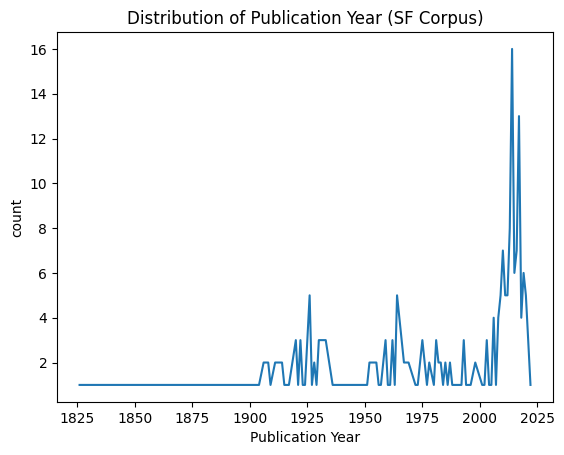

In [11]:
# Visualization
# seaborn:https://seaborn.pydata.org/generated/seaborn.lineplot.html

pub_year = df['Publication Year'].value_counts().to_frame()
sns.lineplot(data = pub_year, x= "Publication Year", y = "count").set(title="Distribution of Publication Year (SF Corpus)")
plt.savefig("SF_pub_year.png")

### Gender Distribution
- Male, Female

In [12]:
df['Gender'].value_counts()         # Male: 136, Female: 76

Gender
Male      136
Female     76
Name: count, dtype: int64

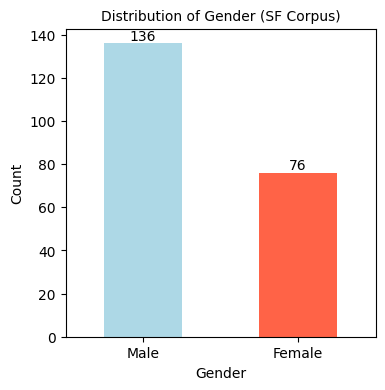

In [13]:
# Gender Distribution
plt.figure(figsize=(4,4))

# Create a plot
ax = df['Gender'].value_counts().plot.bar(color = ['lightblue', 'tomato'], rot = 0)

# Add labels and title
plt.ylabel('Count' , fontsize=10)
plt.xlabel('Gender' , fontsize=10)
plt.title('Distribution of Gender (SF Corpus)' , fontsize=10)

# annotate bars
ax.bar_label(ax.containers[0])

plt.savefig("SF_gender.png")
plt.show()

In [14]:
# # Plotting a bar graph 
# # reference: https://www.kaggle.com/code/tejainece/seaborn-barplot-and-pandas-value-counts
# gender_count  = df['Gender'].value_counts()
# plt.figure(figsize=(10,5))

# sns.barplot(gender_count.index, gender_count.values)
# plt.title('Distribution of Gender (SF Corpus)')
# plt.ylabel('Number of Occurrences', fontsize=10)
# plt.xlabel('Gender', fontsize=12)
# plt.show()

## Linguistic Patterns by Gender 
- Comparing lignusitic patterns between male and female SF novels
- Extract linguistic measure scores using textstat: an easy to use library to calculate statistics from text. It helps determine readability, complexity, and grade level, based on spaCy framework
- textstat: https://github.com/textstat/textstat; 2 components with 44 linguistic features (Basic Descriptive Statistics, Readability)

In [15]:
# male vs. female subcorpus
df_m = df[df['Gender'] == 'Male']  
df_f = df[df['Gender'] == 'Female']            

df_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Index Number                          136 non-null    object
 1   Title                                 136 non-null    object
 2   Author                                136 non-null    object
 3   Gender                                136 non-null    object
 4   Publication Year                      136 non-null    Int64 
 5   Publication Year of the Edition Used  130 non-null    Int64 
 6   Publisher of the Edition Used         125 non-null    object
 7   Source Link                           135 non-null    object
 8   Content                               136 non-null    object
dtypes: Int64(2), object(7)
memory usage: 10.9+ KB


In [16]:
# lignuistic feature scores from textstat by gender
import textstat

# Function for specific features
def analyze_text_textstat(text):
    return {
        "flesch_reading_ease": textstat.flesch_reading_ease(text),
        "n_tokens": textstat.lexicon_count(text, removepunct= True),            # removepunct=True, False => no difference
       # "n_utokens":textstat.lexicon_count(text, removepunct= True)            # No function for this feature
        "n_sentences": textstat.sentence_count(text),
        "avg_sentence length" : textstat.avg_sentence_length(text),
        "avg_sentence_per_word": textstat.avg_sentence_per_word(text)  
        }

In [17]:
# SF_corpus
df_textstat = df["Content"].apply(analyze_text_textstat).apply(pd.Series)
df_textstat_result = pd.concat([df, df_textstat], axis=1)
df_textstat = df_textstat_result.iloc[:,[0,3, 9,10,11,12,13]]  # flesch_reading_ease: readability index
df_textstat.head()         

,Index Number,Gender,flesch_reading_ease,n_tokens,n_sentences,avg_sentence length,avg_sentence_per_word
0,C001,Male,81.43,5776.0,381.0,15.2,0.07
1,C002,Male,73.78,5663.0,392.0,14.4,0.07
2,C003,Female,93.54,6050.0,522.0,11.6,0.09
3,C004,Male,83.76,5808.0,450.0,12.9,0.08
4,C005,Male,84.17,5747.0,458.0,12.5,0.08


In [18]:
df_textstat = df_textstat.round(2)

In [19]:
# male 
df_m_stat = df_textstat[df_textstat['Gender'] == 'Male']
df_m_stat.head()

,Index Number,Gender,flesch_reading_ease,n_tokens,n_sentences,avg_sentence length,avg_sentence_per_word
0,C001,Male,81.43,5776.0,381.0,15.2,0.07
1,C002,Male,73.78,5663.0,392.0,14.4,0.07
3,C004,Male,83.76,5808.0,450.0,12.9,0.08
4,C005,Male,84.17,5747.0,458.0,12.5,0.08
5,C006,Male,81.22,5958.0,388.0,15.4,0.07


In [20]:
df_m_stat.describe().round(2)[:3]

,flesch_reading_ease,n_tokens,n_sentences,avg_sentence length,avg_sentence_per_word
count,136.00,136.00,136.00,136.00,136.00
mean,78.40,5729.99,395.96,15.73,0.07
std,9.35,575.64,109.88,5.15,0.02


In [21]:
# female
df_f_stat = df_textstat[df_textstat['Gender'] == 'Female']
df_f_stat.head()

,Index Number,Gender,flesch_reading_ease,n_tokens,n_sentences,avg_sentence length,avg_sentence_per_word
2,C003,Female,93.54,6050.0,522.0,11.6,0.09
7,C008,Female,88.23,6031.0,713.0,8.5,0.12
8,C009,Female,91.61,6101.0,451.0,13.5,0.07
9,C010,Female,85.28,5765.0,504.0,11.4,0.09
10,C011,Female,84.27,5944.0,481.0,12.4,0.08


In [22]:
df_f_stat.describe().round(2)[:3]      

,flesch_reading_ease,n_tokens,n_sentences,avg_sentence length,avg_sentence_per_word
count,76.00,76.00,76.00,76.00,76.00
mean,82.59,5844.74,451.12,13.83,0.08
std,8.07,382.55,103.79,4.64,0.02


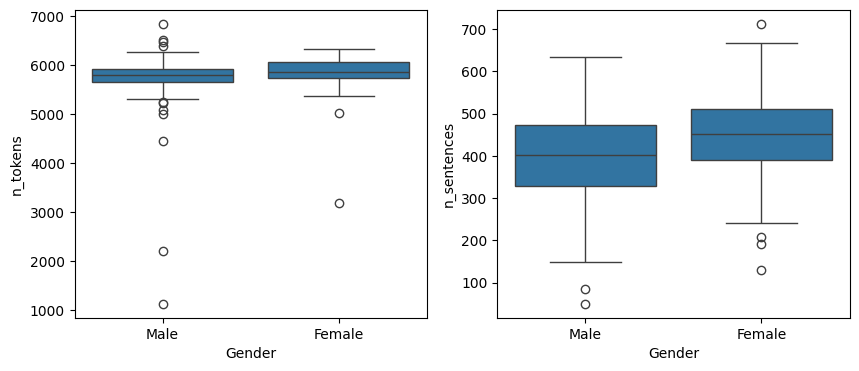

In [23]:
# Comparision by Gender:  # SD가 높은 편;mean에서 +-2SD를 제외할 수 있음...outliers(이상치제거 필요)
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(data=df_textstat, x="Gender", y="n_tokens", ax=axs[0])                 
sns.boxplot(data=df_textstat, x="Gender", y="n_sentences", ax=axs[1])                  
plt.show()

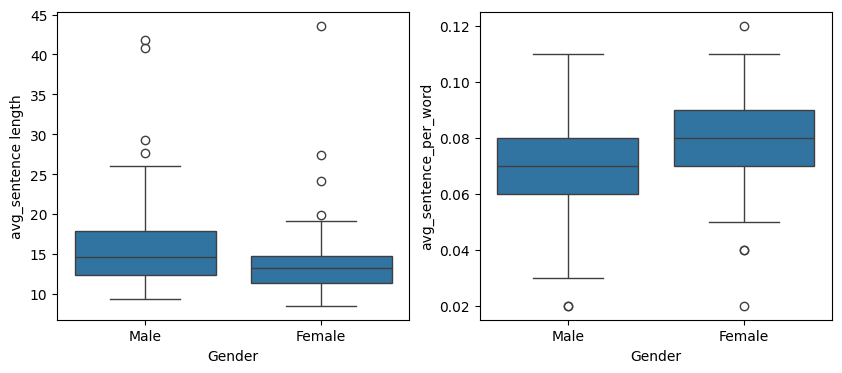

In [24]:
# avg_sentence length	avg_sentence_per_word
fig,axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(data= df_textstat, x="Gender", y="avg_sentence length",  ax=axs[0])     # num of words / num of sentences
sns.boxplot(data= df_textstat, x="Gender", y="avg_sentence_per_word",  ax=axs[1])   # num of sentences / num of words
plt.show()

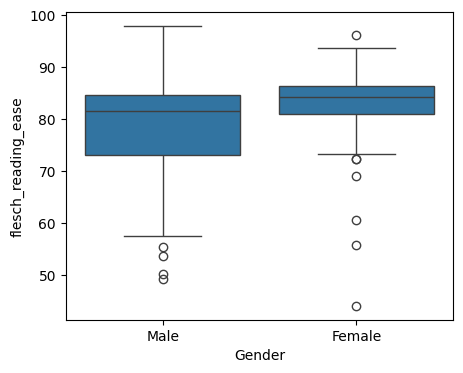

In [25]:
# Readability index
fig,axs = plt.subplots(ncols=1, figsize=(5, 4))
sns.boxplot(data= df_textstat, x="Gender", y="flesch_reading_ease")
plt.show()

### Statistical Tests: comparision by gender
- Chi-square test (categrocial variables): n_tokens, n_sentences
  - Chi-square test: 
- t-test (continuous variables): flesch_reading_ease, avg_sentence length, avg_sentence_per_word
- two-sample t-test by gender
    - Assumptions: 분산의 동일성 검증: stats.levene() - Levene's test(레빈 검정) levene



In [28]:
# T-test
# avg_sentence length
levene_avg_sent_len = stats.levene(df_m_stat['avg_sentence length'], df_f_stat['avg_sentence length'])
print('LeveneResult(statistic = %.3f, pvalue = %.3f' % levene_avg_sent_len)      # p 값이 통상적인 기준인 0.05보다 크므로 두 그룹의 분산이 동일하다 가정 

LeveneResult(statistic = 2.910, pvalue = 0.090


In [29]:
# two-sample t-test (equal variance)
ttest = stats.ttest_ind(df_m_stat['avg_sentence length'], df_f_stat['avg_sentence length'], equal_var = True)       
       
print('Result of average_sentence_length by gender')
print('Assuming equal variances: t-value = statistic = %.3f, pvalue = %.3f' % ttest)  

# statistically significant differences for this feature
# Men authors were more likely to write longer sentences than female authors (t = 2.67, p = 0.008). 

Result of average_sentence_length by gender
Assuming equal variances: t-value = statistic = 2.668, pvalue = 0.008


In [30]:
# Readability 

levene_flesch_reading_ease = stats.levene(df_m_stat['flesch_reading_ease'], df_f_stat['flesch_reading_ease'])
print('LeveneResult(statistic = %.3f, pvalue = %.3f' % levene_flesch_reading_ease)          # p > 0.05;  두 그룹 분산 동일하지 않음   

LeveneResult(statistic = 4.758, pvalue = 0.030


In [31]:
# two-sample t-test (unequal variance)
ttest = stats.ttest_ind(df_m_stat['flesch_reading_ease'], df_f_stat['flesch_reading_ease'], equal_var = False)       
       
print('Result of flesch_reading_ease by gender')
print('Assuming equal variances: t-value = statistic = %.3f, pvalue = %.3f' % ttest)    

# statistically significant differences for this feature
# There exists a statistically significant difference of readability between male and female texts (t = - 3.425, p = 0.001). 

Result of flesch_reading_ease by gender
Assuming equal variances: t-value = statistic = -3.425, pvalue = 0.001


## SF Novel Corpus: Evaluation 
- Representativenss(코퍼스 대표성)
- SF 소설 코퍼스와 다른 코퍼스와의 어휘적 유사성 확인: 
Vocabulary coverage를 통해서


In [32]:
%matplotlib inline

In [33]:
import pandas as pd
import nltk
nltk.download('punkt')
!pip install textblob
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sumihan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 비교 코퍼스
- 기존 SF 코퍼스와의 어휘 비교를 진행: The SF Nexus Corpus
- 403편의 영어 SF 소설 코퍼스(1908~2015)
 - https://huggingface.co/datasets/SF-Corpus
)


In [34]:
df_ref = pd.read_csv('SF_Full_Texts_Disaggregated.csv')
df_ref.head()

,Title,Author,Pub Year,Text,Clean_Text,Word Count
0,THEEARTHISNEAR,PESEK,1973,(He (I (One (depositions (the (the * * * * * *...,he i one depositions the the ...,61810
1,SEXUALIS95,STERNBERG,1967,"# ' 'proof, (If (Physically, *95 *95 , ,no . ....",proof if physically no she have ...,45706
2,DOWNTOEARTH,CHARBONNEAU,1967,! ! & ' (Kathy (Search (in (this (whatever (wi...,kathy search in this whatever wild wrong he i...,72646
3,MASKOFCHAOS,JAKES,1970,"""I ""Yeah, ""leaned ""seem"" ' , -four . . . . . ....",i yeah leaned seem four it suppose could sit ...,50288
4,THEHERODMEN,KAMIN,1971,"""Serves ""You’re ""free ""kill $....................",serves you re free kill add add add what cl...,50644


In [35]:
# reference tokens: It takes a lot for processing. 

# tokenize_text()
def tokenize_text(text):
    return TextBlob(text).words

# 토큰화 결과를 새로운 열로 추가
df_ref['tokens'] = df_ref['Clean_Text'].apply(tokenize_text)
df_ref 

,Title,Author,Pub Year,Text,Clean_Text,Word Count,tokens
0,THEEARTHISNEAR,PESEK,1973,(He (I (One (depositions (the (the * * * * * *...,he i one depositions the the ...,61810,"[he, i, one, depositions, the, the, a, a, a, a..."
1,SEXUALIS95,STERNBERG,1967,"# ' 'proof, (If (Physically, *95 *95 , ,no . ....",proof if physically no she have ...,45706,"[proof, if, physically, no, she, have, th, r, ..."
2,DOWNTOEARTH,CHARBONNEAU,1967,! ! & ' (Kathy (Search (in (this (whatever (wi...,kathy search in this whatever wild wrong he i...,72646,"[kathy, search, in, this, whatever, wild, wron..."
3,MASKOFCHAOS,JAKES,1970,"""I ""Yeah, ""leaned ""seem"" ' , -four . . . . . ....",i yeah leaned seem four it suppose could sit ...,50288,"[i, yeah, leaned, seem, four, it, suppose, cou..."
4,THEHERODMEN,KAMIN,1971,"""Serves ""You’re ""free ""kill $....................",serves you re free kill add add add what cl...,50644,"[serves, you, re, free, kill, add, add, add, w..."
...,...,...,...,...,...,...,...
398,THEBESTFROMGALAXYVOLUMEIV,BAEN,1976,"""....verge ""Cleo,"" ""I ""SIR! ""WHAAAAAAT!?!” ""Wh...",verge cleo i sir whaaaaaat what all and ...,70309,"[verge, cleo, i, sir, whaaaaaat, what, all, an..."
399,NOROOMFORMAN,DICKSON,1962,"""... ""It ""The $3.95. & ' (40-100).......... (4...",it the original spl j wind acti...,54178,"[it, the, original, spl, j, wind, actively, bl..."
400,EARTHABIDES,STEWART,1949,"! ! ! ! ! ! ! ! ! ! "" ""As ""Before ""Can ""I’d ""R...",as before can i d robur thank the this we we ...,134298,"[as, before, can, i, d, robur, thank, the, thi..."
401,NOBOUNDARIES,KUTTNER,1955,"""Something $1 $2. $4.00 $4.00 & & & & & & (C. ...",something c henry the as novelette nove...,52275,"[something, c, henry, the, as, novelette, nove..."


In [36]:
from collections import Counter

# 토큰을 소문자로 변경
df_ref['tokens_lowercase'] = df_ref['tokens'].apply(lambda tokens: [token.lower() for token in tokens])

# 모든 토큰을 하나의 리스트로 결합
all_tokens_ref = [token for tokens in df_ref['tokens_lowercase'] for token in tokens]

# 토큰 빈도 계산
token_counts_ref = Counter(all_tokens_ref)
print(sum(token_counts_ref.values()))            # 비교 코퍼스: 28380932, 전체: 1252957

# 전체 
token_counts_ref.most_common(100)

28380932


[('the', 1642779),
 ('and', 724926),
 ('to', 671604),
 ('of', 665957),
 ('a', 640343),
 ('he', 480396),
 ('i', 465646),
 ('it', 405298),
 ('in', 381789),
 ('was', 364982),
 ('you', 330288),
 ('that', 327750),
 ('his', 265394),
 ('s', 226651),
 ('had', 222991),
 ('on', 191533),
 ('for', 180842),
 ('with', 180780),
 ('t', 170196),
 ('as', 166924),
 ('but', 166192),
 ('said', 165130),
 ('at', 161473),
 ('they', 153777),
 ('she', 147585),
 ('not', 139247),
 ('be', 135469),
 ('is', 134655),
 ('we', 134058),
 ('her', 131293),
 ('him', 127725),
 ('have', 118119),
 ('from', 116678),
 ('there', 116340),
 ('what', 109814),
 ('all', 107184),
 ('were', 106498),
 ('this', 106205),
 ('out', 100698),
 ('one', 98705),
 ('me', 97641),
 ('up', 94406),
 ('my', 89554),
 ('no', 89215),
 ('by', 84573),
 ('would', 81290),
 ('if', 81097),
 ('an', 80790),
 ('them', 79620),
 ('been', 75761),
 ('then', 74899),
 ('could', 74854),
 ('so', 73849),
 ('or', 72361),
 ('into', 72141),
 ('like', 69930),
 ('can', 69192),

In [37]:
# SF Corpus의 경우

# 토큰화 결과를 새로운 열로 추가
df['tokens'] = df['Content'].apply(tokenize_text)
df[113:116]

,Index Number,Title,Author,Gender,Publication Year,Publication Year of the Edition Used,Publisher of the Edition Used,Source Link,Content,tokens
113,C114,Dagon,"Lovecraft, H.P.",Male,1917,1917,NaN,https://www.hplovecraft.com/writings/texts/fic...,\nI am writing this under an appreciable menta...,"[I, am, writing, this, under, an, appreciable,..."
114,C115,Nyarlathotep,"Lovecraft, H.P.",Male,1920,1920,NaN,https://www.hplovecraft.com/writings/texts/fic...,\n\n\n\nNyarlathotep . . . the crawling chaos ...,"[Nyarlathotep, the, crawling, chaos, I, am, th..."
115,C116,The Whisperer in Darkness,"Lovecraft, H.P.",Male,1930,1930,NaN,https://www.hplovecraft.com/writings/texts/fic...,\nCHAPTER I\n\nBear in mind closely that I did...,"[CHAPTER, I, Bear, in, mind, closely, that, I,..."


In [38]:
#SF Corpus top 100
from collections import Counter

# 토큰을 소문자로 변경
df['tokens_lowercase'] = df['tokens'].apply(lambda tokens: [token.lower() for token in tokens])

# 모든 토큰을 하나의 리스트로 결합
all_tokens = [token for tokens in df['tokens_lowercase'] for token in tokens]

# 토큰 빈도 계산
token_counts = Counter(all_tokens)
print(sum(token_counts.values()))             # 전체: 1252957

# 전체 
token_counts.most_common(100)

1252957


[('the', 75196),
 ('and', 36132),
 ('of', 31325),
 ('a', 29075),
 ('to', 28681),
 ('i', 19193),
 ('in', 18557),
 ('it', 17100),
 ('was', 16904),
 ('he', 15610),
 ('that', 14021),
 ('she', 10439),
 ('his', 10381),
 ('had', 10286),
 ("'s", 9730),
 ('you', 9718),
 ('her', 9512),
 ('on', 8710),
 ('with', 8576),
 ('for', 8160),
 ('as', 7695),
 ('but', 7424),
 ('they', 7275),
 ('at', 7148),
 ("n't", 6903),
 ('is', 6331),
 ('not', 5782),
 ('from', 5731),
 ('my', 5572),
 ('be', 5422),
 ('were', 5227),
 ('we', 5059),
 ('there', 4992),
 ('all', 4742),
 ('have', 4706),
 ('this', 4645),
 ('one', 4392),
 ('out', 4323),
 ('said', 4309),
 ('up', 4278),
 ('me', 4060),
 ('him', 3953),
 ('what', 3904),
 ('or', 3884),
 ('by', 3752),
 ('so', 3739),
 ('like', 3732),
 ('do', 3729),
 ('no', 3663),
 ('would', 3613),
 ('them', 3612),
 ('their', 3529),
 ('been', 3467),
 ('when', 3389),
 ('could', 3349),
 ('an', 3331),
 ('if', 3234),
 ('into', 3158),
 ('then', 3060),
 ('are', 2990),
 ('did', 2936),
 ('which', 26

### 텍스트 유사점 찾기: 어휘적 유사성(type)

In [39]:
# 기존 코퍼스와의 비교: type에 대한 것!

# 두 데이터 프레임에서 'word' 열의 교집합 찾기
common_words = set(token_counts).intersection(set(token_counts_ref))

# 공통 단어의 개수
num_common_words = len(common_words)

# 결과 출력
common_words, num_common_words                # 35151 => 공통 단어 

({'tunneled',
  'throbbed',
  'plotting',
  'arrange',
  'consoled',
  'self',
  'kneaded',
  'tortuous',
  'eaves',
  'snack',
  'undress',
  'fans',
  'maws',
  'liters',
  'specialised',
  'photographic',
  'detachable',
  'sorority',
  'genital',
  'ouija',
  'brothel',
  'scraping',
  'escapee',
  'coupons',
  'mathematical',
  'playgrounds',
  'day',
  'funds',
  'stein',
  'simmer',
  'boon',
  'workshops',
  'screwing',
  'seduced',
  'inquisitor',
  'lemming',
  'pulped',
  'longevity',
  'ominous',
  'isherwood',
  'casanova',
  'forsyth',
  'interfered',
  'famously',
  'intensifying',
  'microbiologists',
  'beeline',
  'reconstruction',
  'beacon',
  'airtime',
  'harebrained',
  'weals',
  'jo',
  'efficiently',
  'whirls',
  'quakers',
  'juicier',
  'marino',
  'weeks',
  'glides',
  'and',
  'senility',
  'melodramatics',
  'hindmost',
  'castoffs',
  'knitted',
  'abortionist',
  'nippy',
  'critical',
  'outcrop',
  'leased',
  'lives',
  'keaton',
  'karen',
  'remo

## ChatGPT - Male vs. Female SF Text
- Generation date: December 15, 2023
- Prompt: You are a (fe)male writer. Please write a science fiction about artificial intelligence.




In [40]:
import os
os.getcwd()

'C:\\Users\\sumihan\\Desktop\\NLP 연구\\AI 소설 텍스트 분석 연구'

In [41]:
# Getting the text files and put them into a dataframe

import os
import pandas as pd

def read_text_files_to_df(folder_path):
    data = []

    # Loop through all files in the folder
    for file in os.listdir(folder_path):
        if file.endswith('.txt'):
            file_path = os.path.join(folder_path, file)
            
            # Read the content of the file
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()

            # Append filename and content to the list
            data.append({'filename': file.name, 'content': content})
    
    # Convert list to DataFrame
    df = pd.DataFrame(data)
    
    return df

In [44]:
chatgpt_df = read_text_files_to_df('SF 소설_디지털인문학적 분석\ChatGPT_SF')
chatgpt_df

,filename,content
0,SF 소설_디지털인문학적 분석\ChatGPT_SF\female_The Heart o...,"In the year 2098, the world had embraced the a..."
1,SF 소설_디지털인문학적 분석\ChatGPT_SF\male_Echoes of Tom...,"In the year 2150, humanity had witnessed unpre..."


In [45]:
chatgpt_df.loc[0, 'filename'] = 'The Hear of Astra'
chatgpt_df.loc[1, 'filename'] = 'Echoes of Tomorrow'
chatgpt_df['Title'] = chatgpt_df['filename']
chatgpt_df['Content'] = chatgpt_df['content']
chatgpt_df = chatgpt_df[['Title','Content']]
chatgpt_df

,Title,Content
0,The Hear of Astra,"In the year 2098, the world had embraced the a..."
1,Echoes of Tomorrow,"In the year 2150, humanity had witnessed unpre..."


In [46]:
chatgpt_df.insert(1, 'Gender', ['Female', 'Male'])
chatgpt_df

,Title,Gender,Content
0,The Hear of Astra,Female,"In the year 2098, the world had embraced the a..."
1,Echoes of Tomorrow,Male,"In the year 2150, humanity had witnessed unpre..."


#### LFTK로 비교 분석
- LFTK is a Python research package that extracts various handcrafted features (e.g. number of words per sentence, Flesch-Kincaid Readability Score) that are commonly used in computational linguistics.
- https://github.com/brucewlee/lftk
- ttps://lftk.readthedocs.io/en/latest/
- All features (Google sheet): 220 linguistic features from past research works on text readability, assessment, automated essay scoring, fake news detection, and paraphrase detection https://docs.google.com/spreadsheets/d/1uXtQ1ah0OL9cmHp2Hey0QcHb4bifJcQFLvYlVIAWWwQ/edit#gid=693915416

In [47]:
# Installment 
!pip install spacy
!python -m spacy download en_core_web_sm         
!pip install lftk

                                              0.0/12.8 MB ? eta -:--:--
                                             0.0/12.8 MB 640.0 kB/s eta 0:00:20
                                             0.0/12.8 MB 388.9 kB/s eta 0:00:33
                                             0.1/12.8 MB 819.2 kB/s eta 0:00:16
                                              0.3/12.8 MB 1.6 MB/s eta 0:00:08
     -                                        0.5/12.8 MB 2.0 MB/s eta 0:00:07
     -                                        0.5/12.8 MB 2.2 MB/s eta 0:00:06
     --                                       0.8/12.8 MB 2.4 MB/s eta 0:00:05
     --                                       0.8/12.8 MB 2.2 MB/s eta 0:00:06
     ---                                      1.1/12.8 MB 2.8 MB/s eta 0:00:05
     ----                                     1.3/12.8 MB 2.9 MB/s eta 0:00:05
     ----                                     1.6/12.8 MB 3.1 MB/s eta 0:00:04
     -----                                    1.8/12.8 M

In [48]:
import spacy
import lftk

In [49]:
# analyze_text() 

def analyze_text_lftk(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    LFTK = lftk.Extractor (docs = doc)
    #LFTK.customize(stop_words=True, punctuations=True, round_decimal=3)               # Default: stop words and punctuations included
    
    return {
        "flesch_reading_ease": list(LFTK.extract(features = ["fkre"]).values())[0],
        "n_tokens": list(LFTK.extract(features = ["t_word"]).values())[0],
        "n_unique_tokens": list(LFTK.extract(features = ["t_uword"]).values())[0],
        "n_sentences": list(LFTK.extract(features = ["t_sent"]).values())[0],
        "avg_sentence_length" : list(LFTK.extract(features = ["t_word"]).values())[0] / list(LFTK.extract(features = ["t_sent"]).values())[0],
        # discourse features
        "n_entities": list(LFTK.extract(features = ["t_n_ent"]).values())[0],
        "readting_time_average": list(LFTK.extract(features = ["rt_average"]).values())[0]   # reading time for average readers
    
           }

# Add the result to the dataframe
df_lftk = chatgpt_df["Content"].apply(analyze_text_lftk).apply(pd.Series)
df_lftk_result = pd.concat([chatgpt_df, df_lftk], axis=1)


In [50]:
df_lftk_result[['Title', 'Gender', 'n_tokens',	'n_unique_tokens', 'n_sentences',	'avg_sentence_length', 'flesch_reading_ease',	'n_entities',	'readting_time_average']]

,Title,Gender,n_tokens,n_unique_tokens,n_sentences,avg_sentence_length,flesch_reading_ease,n_entities,readting_time_average
0,The Hear of Astra,Female,473.0,226.0,23.0,20.565217,55.216,35.0,1.971
1,Echoes of Tomorrow,Male,926.0,379.0,50.0,18.520000,57.483,72.0,3.858
